# 뒤지게 중요함

### 모델이 아니라, 각 모델들에서 최적점을 찾는 방법에 대한 이야기

# 확률적 경사 하강법
### SGD: Stochastic Gradient Descent
https://www.mltut.com/stochastic-gradient-descent-a-super-easy-complete-guide/

- 머신러닝에도 많이 사용하지만 딥러닝에서 많이 사용
- 데이터가 추가되었을 경우 모델을 새로 만드는 대신 기존 모델을 자체적으로 조금씩 수정하면서 사용
- 이게 등장하면서 딥러닝이 아주 유용해졌음

1. 최초 학습한다.
2. 새로운 데이터로 모델을 추가하여 새롭게 학습한다.
3. 추가된 갯수만큼 기존의 데이터를 버린다.
(기존 모델이 조금씩 수정됨)

- 확률적: 랜덤
- 경사: 기울기
- 곡선의 최적점을 찾기 위해 아래로 하강하면서 최적점(기울기가 0이 되는 지점)을 탐색하는 방법
- 방금 찾아낸 지점이 global minimum이 아닐 가능성이 있기 때문에 랜덤하게 여러 곳에서 시작한다.

### 한 번에 한 개씩 뽑아서 경사하강법을 실시
### 한 번에 여러개 뽑아서 경사하강법: mini-batch 경사하강법  V 딥러닝에서 주로 씀
### 한 번에 다 뽑아(3억개라도 전부 다): batch 검사하강법

- Epoch: 훈련세트를 다 사용하였을 경우의 단계(리필함)
- 미니배치(mini batch) 경사 하강법 중 미니배치의 갯수: Hyper Parameter. 보통 2의 배수
- 배치경사하강법: 샘플을 한 번에 몽땅 꺼냄 > 메모리나 CPU에 영향을 많이 주기 때문에 잘 안 쓰임

### 손실함수(비용함수)
- 머신러닝 알고리즘이 에러율을 측정하는 함수
- 손실함수 값이 적은 것이 정확도가 높다
- 내가 예측한 y^이 10인데 실제 y가 6: 손실값 4
- 내가 예측한 y^이 5인데 실제 y가 4: 손실값 1 -> 이녀석이 더 좋다.

- 확률적 검사함수를 통해 손실함수 낮은 값 찾는 것
- 분류함수인 경우 정확도를 사용하는데, 이 정확도의 값은 미분할 수 없어(연속X) 손실함수로 사용할 수 없다.
- 그래서 분류함수인 경우 로지스틱 손실함수, 이진크로스엔트로피 손실함수를 사용한다.

In [25]:
import pandas as pd

fish = pd.read_csv('data/fishes.csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [26]:
# Feature = drop Species
fish_input = fish.drop('Species', axis=1).to_numpy()
fith_target = fish['Species'].to_numpy()

print(fish_input[:5])
print(fith_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [27]:
# Train/Test Split
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fith_target, random_state=42)

### 표준화 시키기
: 경사 하강법을 사용할 경우 샘플의 크기때문에 경사 각도가 바뀔 수 있으므로 각 Feature의 Scale을 표준화해야 한다

In [28]:
# 표준화 시키기
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled = scaler.fit_transform(train_input)
test_scaled = scaler.transform(test_input)

---
### 확률적 경사하강법의 분류 알고리즘 적용

In [29]:
from sklearn.linear_model import SGDClassifier # SGD Regressor도 있음
sgdc = SGDClassifier(
    loss='log', # 분류의 경우 손실함수는 logistic 손실함수를 사용해야 함
    max_iter=10, # 최대 반복 횟수: Epoch
    random_state=42
)

In [30]:
sgdc.fit(train_scaled, train_target)
print('train score:', sgdc.score(train_scaled, train_target))
print('test score:', sgdc.score(test_scaled, test_target))

train score: 0.773109243697479
test score: 0.775


/Users/tj/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


> score가 낮고 과소적합됨 > partial_fit을 사용한다.   
> 기존 w와 b의 계수값을 유지한 채 Update 수행   
> 만약 다시 fit을 사용하면 기존에 학습했던 내용을 모두 버리는 것 > 그라믄 안 됨   
> 10번 찍어본 것에서 이어서 하는 것이 partial_fit

In [31]:
sgdc.partial_fit(train_scaled, train_target)
print('train score:', sgdc.score(train_scaled, train_target))
print('test score:', sgdc.score(test_scaled, test_target))

train score: 0.8151260504201681
test score: 0.85


##### 수행할 수록 좋아짐

> 처음 점수보다 새 학습내용을 수정해서 사용하니 점수가 증가했다.   
> 이와 같이 점진적으로 정확도를 높이는 방법이 확률적 경사 하강법.   
> 그런데, 처음보다 점수가 증가했지만 아직 과소적합.   
> 일단 과대적합을 만들고 규제를 할 것이다

---
### Epoch와 과대/과소적합
- 초반에는 과소로 시작해서 Epoch가 늘어나면 과대적합으로 이동함
- 적절한 시점에 중단하는 것이 중요 - 조기종료(Early Stopping) 시점 파악
- 규제값이 작아지면 과대적합이 된다.
- 규제값이 커지면 과소적합에 머무른다.
- 조기종료 시점은 Train score와 Test score의 차이가 적어지면 종료해라 이런 식으로 쓸 수 있음

In [50]:
import numpy as np
# sg는 모델이 아니라 일찍 끝내기 위해 도와주는 녀석. 모델은 log임
sc = SGDClassifier(loss='log', random_state=42) # max_iter 안 줌
train_score = []
test_score = []

classes = np.unique(train_target)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [33]:
for _ in range(0, 500): # partial fit을 신나게 돌려보자
  # partial fit을 하기 전에 fit을 한 번도 한 적이 없으면 classes를 정의해 주어 전체 classes에 대한 수정 작업이 일어나게 해 줘야 함
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

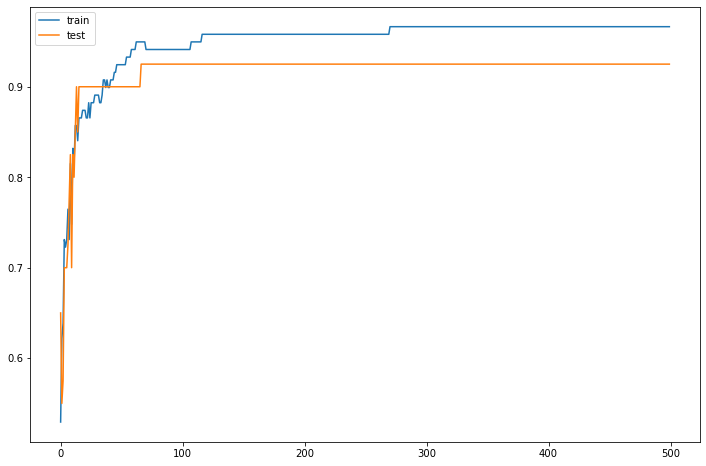

In [48]:
# 시각화
import matplotlib.pyplot as plt
# plt size
plt.figure(figsize=(12, 8))
plt.plot(train_score, label='train')
plt.plot(test_score, label='test')
plt.legend()
plt.show()

##### 100번쯤에서 test가 높으면서 train과 test 차이가 가장 적다

In [35]:
# max_iter 100으로 새롭게 학습하기
sc = SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)
# tol: 따로 설정한 조기 종료 기준: 지금은 조건에 따라 종료하는게 아니라 100번 돌고 종료하는 것이라 조기종료 기준이 없음
# tol이 없는 지금은 최적의 손실값보다 큰 경우 종료됨(무작정 끝까지 가지는 않음)

sc.fit(train_scaled, train_target)
print('train score:', sc.score(train_scaled, train_target))
print('test score:', sc.score(test_scaled, test_target))

train score: 0.957983193277311
test score: 0.925


In [49]:
# 조기종료 기준을 설정해보자
sc = SGDClassifier(loss='log', max_iter=1000, random_state=42, tol=0.001)
sc.fit(train_scaled, train_target)
print('train score:', sc.score(train_scaled, train_target))
print('test score:', sc.score(test_scaled, test_target))

train score: 0.8403361344537815
test score: 0.8


##### train 선과 test 선이 중간에 교차해버리기 때문에 일찍 종료가 되어버림 > 그냥 쓰면 안 됨

---
### SVM을 이용한 확률적 경사 하강법

In [51]:
sc = SGDClassifier(loss='hinge', # hinge = svm
  max_iter=100, random_state=42, tol=None)

sc.fit(train_scaled, train_target)
print('train score:', sc.score(train_scaled, train_target))
print('test score:', sc.score(test_scaled, test_target))

train score: 0.9495798319327731
test score: 0.925
